| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Nama : Monika Belva Celesta
## NIM    : A12.2020.06392

# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    
    # Autentikasi dan akses menggunakan keys
    auth = tweepy.OAuthHandler("918jGk0FXin1RU7TGrXQNhEVS", 
    "MUtmQOmbKVmYUS2Aq0spOPOdMQsdqzTYf82EYUGW8dbtTGbRAR")
    auth.set_access_token("1574652392255021057-nvMImJSpDnyuO2DfNIRPxEHxjjsYD5", 
    "rs9Eb0vcn7291OflCzcYtclHMpg61WZkldsmwDSy0hFHS")
    
    # Kembalikan akses ke API
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username
username yang saya gunakan yaitu @tokopedia

In [4]:
tweets = extractor.user_timeline(screen_name="tokopedia", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 100.

5 tweet teratas:

CATET NIH JAM NYA‼️

Karena bakalan ada Flash Sale #KejarDiskon spesial Waktu Indonesia Belanja di Tokopedia mulai… https://t.co/Ljc1pZUXt9

Mana nih yang dari kemarin maju mundur mau beli alat olahraga? 

Mending langsung aja deh cek sekarang, karena ada… https://t.co/OVVnyl4wGn

Toppers, di cuaca yang tak menentu kini, yukk jaga kesehatan kamu dengan tambahan amunisi dari #HealthBrandParade!… https://t.co/14La2o7cRB

RT @TokopediaCare: Jualan di Tokopedia emang paling nguntungin dan anti ribet kok, asalkan kamu gak menjual jenis produk yang dilarang dipe…

Liptint implora yang lagi viral lagi flash sale nihh bestieee🥰

Harganya jadi dibawah 10 ribuuu.. Cus lah… https://t.co/sSkp8pGy8k



## Memasukkan ke dataframe pandas

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(10))

,Tweets
0,CATET NIH JAM NYA‼️\n\nKarena bakalan ada Flas...
1,Mana nih yang dari kemarin maju mundur mau bel...
2,"Toppers, di cuaca yang tak menentu kini, yukk ..."
3,RT @TokopediaCare: Jualan di Tokopedia emang p...
4,Liptint implora yang lagi viral lagi flash sal...
5,"Kalo Toppers juga yakin penasaran, langsung ce..."
6,@gojekindonesia Votingnya udah selesaii! Dua-d...
7,"Hi Toppers, udah liat hasil voting Tempe\nMend..."
8,Pray for Itaewon 💔
9,Cari barang gemas dan murah di Tokopedia aja🥰\...


In [6]:
dataset.to_csv('dataset_tokopedia.csv')

## Menetukan sentimen pada tweet

In [7]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [8]:
# Autentikasi dan akses menggunakan keys
auth = tweepy.OAuthHandler("918jGk0FXin1RU7TGrXQNhEVS","MUtmQOmbKVmYUS2Aq0spOPOdMQsdqzTYf82EYUGW8dbtTGbRAR")
auth.set_access_token("1574652392255021057-nvMImJSpDnyuO2DfNIRPxEHxjjsYD5","rs9Eb0vcn7291OflCzcYtclHMpg61WZkldsmwDSy0hFHS")
api = tw.API(auth)
    
hasilsearch = api.search_tweets(q="tokopedia",lang="id",count=100) 

In [9]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["Tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

Akhirnya ktemu minyak yg ampuh ilngin gatal gigitan nyamuk setan dsini Gara2 temen kasi coba tadi Wahhh langsung
'list' object has no attribute 'strip'
RT Tampil Gagah sekaligus menambah percaya diri kamu dengan kemeja warna army dari Sahabat Ganjar Segera beli melalui S
'list' object has no attribute 'strip'
RT NEWS Hari ini Nadila Wantari akan Live di Aplikasi Tokopedia untuk berbincang bincang dan juga akan menyanyikan bebe
'list' object has no attribute 'strip'
Cek harga grosir gulaku
'list' object has no attribute 'strip'
qanun kabupaten aceh tengah nomor 4 tahun 2011
'list' object has no attribute 'strip'
Ikut aku kejar hadiah dengan total nilai puluhan juta Rupiah lewat Panen Telur yuk Klik di sini
'list' object has no attribute 'strip'
Ini nder link tokpednya yg butuh
'list' object has no attribute 'strip'
RT Produk Ampuh Untuk Bekas Luka 1 Serum badan Musk thahara 2 Vaseline gluta hya
'list' object has no attribute 'strip'
Semakin mudah belanja produk Iklilah Shop di Tokopedia

'list' object has no attribute 'strip'
Coba cek ini deh tunik import turun naik Rp200 000 di toko Arsystorre Tokopedia Bisa bebas ongkir lho
'list' object has no attribute 'strip'
RT Coba cek ini deh jaket jeans CD rajut import Rp190 000 di toko Arsystorre Tokopedia Bisa bebas ongkir lho
'list' object has no attribute 'strip'
Coba cek ini deh jaket jeans CD rajut import Rp190 000 di toko Arsystorre Tokopedia Bisa bebas ongkir lho
'list' object has no attribute 'strip'
WTS Eksklusif Photobook BTS X TOKOPEDIA LIMITED EDITION Karena Hanya Ada 200 Photobook Harga DM WTS
'list' object has no attribute 'strip'
Coba cek ini deh Blazer blanik carlo premium Rp189 000 di toko Arsystorre Tokopedia Bisa bebas ongkir lho
'list' object has no attribute 'strip'
RT Want to sale Wtt wtb wts bts ina Wts bts x tokopedia 45k all MEDAN Bisa oren
'list' object has no attribute 'strip'
Coba cek ini deh atasan wanita circle Rp85 000 di toko Arsystorre Tokopedia Bisa bebas ongkir lho
'list' object has no attri

In [10]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,Tweet,sentimen
0,2022-10-30 15:25:00+00:00,Qweensolo,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0
1,2022-10-30 15:24:19+00:00,tuankurakyat,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0
2,2022-10-30 15:24:09+00:00,Apriant89116037,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1
3,2022-10-30 15:23:38+00:00,PijatRovos,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0
4,2022-10-30 15:23:38+00:00,pijatinf,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0
...,...,...,...,...
95,2022-10-30 14:09:21+00:00,skawngr_j,"Halo @tokopedia @TokopediaCare , kenapa pesana...",0
96,2022-10-30 14:08:51+00:00,blefssing,RT @akusayangdk: Hai MY👋🏼\nSiapa nih yg cari a...,1
97,2022-10-30 14:08:48+00:00,kedaiboekoe,RT @kedaiboekoe: Utas buku filsafat yang terse...,0
98,2022-10-30 14:08:42+00:00,chopeedia,Buat adek keponakan atau anak sabi nih. https:...,0


In [11]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Load dataset mentah - lihat skema klasifikasi

In [12]:
df = pd.read_csv('Dataset_Sentimen.csv')

# Preprocessing Tahap 00

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['tanggal_tweet'], axis=1)
df = df.drop(['pengguna'], axis=1)

## cek info

In [14]:
df.head()

,Tweet,sentimen
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [16]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\ACER SWIFT\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\ACER SWIFT\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [18]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [19]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [20]:
df["step01"] = final_string

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `step01`

In [21]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,sentimen,step01
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...
5,Ikut aku kejar hadiah dengan total nilai puluh...,0,ikut aku kejar hadiah dengan total nilai puluh...
6,@twayboo_ @ohmybeautybank Ini nder link tokped...,0,user user ini nder link tokpednya yg butuh coy...
7,RT @Lenspp: ✨Produk Ampuh Untuk Bekas Luka✨\n\...,0,rt user produk ampuh untuk bekas luka number s...
8,Semakin mudah belanja produk Iklilah Shop di T...,0,semakin mudah belanja produk iklilah shop di t...
9,RT @jayparkgf9: 🌷 rekomendasi sling bag wanita...,0,rt user rekomendasi sling bag wanita number co...


## Hapus data kosong

In [22]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [23]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     0 non-null      object
 1   sentimen  0 non-null      int64 
 2   step01    0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [24]:
df_hapus.head(10)

,Tweet,sentimen,step01


In [25]:
df_new = df[~df.isin(df_hapus)].dropna()

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
 2   step01    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [27]:
df_new

,Tweet,sentimen,step01
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...
...,...,...,...
95,"Halo @tokopedia @TokopediaCare , kenapa pesana...",0,halo user user kenapa pesanan saya dibatalkan ...
96,RT @akusayangdk: Hai MY👋🏼\nSiapa nih yg cari a...,1,rt user hai my siapa nih yg cari aebong yuk bi...
97,RT @kedaiboekoe: Utas buku filsafat yang terse...,0,rt user utas buku filsafat yang tersedia di ke...
98,Buat adek keponakan atau anak sabi nih. https:...,0,buat adek keponakan atau anak sabi nih colip9q...


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [28]:
## Bisa menggunakan nltk 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to C:\Users\ACER
[nltk_data]     SWIFT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [30]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `tokens`

In [31]:
df_new.head(10)

,Tweet,sentimen,step01,tokens
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...,"[akhirnya, ktemu, minyak, yg, ampuh, ilngin, g..."
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...,"[rt, user, tampil, gagah, sekaligus, menambah,..."
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...,"[rt, user, news, hari, ini, nadila, wantari, a..."
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku,"[co9ub8diyst6, cek, harga, grosir, gulaku]"
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...,"[cogyzek, time, uz, cob8qst5htjg, qanun, kabup..."
5,Ikut aku kejar hadiah dengan total nilai puluh...,0,ikut aku kejar hadiah dengan total nilai puluh...,"[ikut, aku, kejar, hadiah, dengan, total, nila..."
6,@twayboo_ @ohmybeautybank Ini nder link tokped...,0,user user ini nder link tokpednya yg butuh coy...,"[user, user, ini, nder, link, tokpednya, yg, b..."
7,RT @Lenspp: ✨Produk Ampuh Untuk Bekas Luka✨\n\...,0,rt user produk ampuh untuk bekas luka number s...,"[rt, user, produk, ampuh, untuk, bekas, luka, ..."
8,Semakin mudah belanja produk Iklilah Shop di T...,0,semakin mudah belanja produk iklilah shop di t...,"[semakin, mudah, belanja, produk, iklilah, sho..."
9,RT @jayparkgf9: 🌷 rekomendasi sling bag wanita...,0,rt user rekomendasi sling bag wanita number co...,"[rt, user, rekomendasi, sling, bag, wanita, nu..."


In [32]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [33]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [34]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [35]:
df_new["step02"] = final_string_tokens

#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [37]:
df_new.head(10)

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...,"[akhirnya, ktemu, minyak, yg, ampuh, ilngin, g...","[akhirnya, ketemu, minyak, yang, ampuh, ilngin...",akhirnya ketemu minyak yang ampuh ilngin gatal...
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...,"[rt, user, tampil, gagah, sekaligus, menambah,...","[rt, user, tampil, gagah, sekaligus, menambah,...",rt user tampil gagah sekaligus menambah percay...
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...,"[rt, user, news, hari, ini, nadila, wantari, a...","[rt, user, news, hari, ini, nadila, wantari, a...",rt user news hari ini nadila wantari akan live...
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku,"[co9ub8diyst6, cek, harga, grosir, gulaku]","[co9ub8diyst6, cek, harga, grosir, gulaku]",co9ub8diyst6 cek harga grosir gulaku
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...,"[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...","[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...",cogyzek time uz cob8qst5htjg qanun kabupaten a...
5,Ikut aku kejar hadiah dengan total nilai puluh...,0,ikut aku kejar hadiah dengan total nilai puluh...,"[ikut, aku, kejar, hadiah, dengan, total, nila...","[ikut, aku, kejar, hadiah, dengan, total, nila...",ikut aku kejar hadiah dengan total nilai puluh...
6,@twayboo_ @ohmybeautybank Ini nder link tokped...,0,user user ini nder link tokpednya yg butuh coy...,"[user, user, ini, nder, link, tokpednya, yg, b...","[user, user, ini, nder, link, tokpednya, yang,...",user user ini nder link tokpednya yang butuh c...
7,RT @Lenspp: ✨Produk Ampuh Untuk Bekas Luka✨\n\...,0,rt user produk ampuh untuk bekas luka number s...,"[rt, user, produk, ampuh, untuk, bekas, luka, ...","[rt, user, produk, ampuh, untuk, bekas, luka, ...",rt user produk ampuh untuk bekas luka number s...
8,Semakin mudah belanja produk Iklilah Shop di T...,0,semakin mudah belanja produk iklilah shop di t...,"[semakin, mudah, belanja, produk, iklilah, sho...","[semakin, mudah, belanja, produk, iklilah, sho...",semakin mudah belanja produk iklilah shop di t...
9,RT @jayparkgf9: 🌷 rekomendasi sling bag wanita...,0,rt user rekomendasi sling bag wanita number co...,"[rt, user, rekomendasi, sling, bag, wanita, nu...","[rt, user, rekomendasi, sling, bag, wanita, nu...",rt user rekomendasi sling bag wanita number co...


## simpan file terlebih dahulu

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [38]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## load sastrawi

In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## stopwords

In [40]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [41]:
df_new['step02'] = df_new['step02'].apply(str)

In [42]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...,"[akhirnya, ktemu, minyak, yg, ampuh, ilngin, g...","[akhirnya, ketemu, minyak, yang, ampuh, ilngin...",akhirnya ketemu minyak yang ampuh ilngin gatal...
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...,"[rt, user, tampil, gagah, sekaligus, menambah,...","[rt, user, tampil, gagah, sekaligus, menambah,...",rt user tampil gagah sekaligus menambah percay...
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...,"[rt, user, news, hari, ini, nadila, wantari, a...","[rt, user, news, hari, ini, nadila, wantari, a...",rt user news hari ini nadila wantari akan live...
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku,"[co9ub8diyst6, cek, harga, grosir, gulaku]","[co9ub8diyst6, cek, harga, grosir, gulaku]",co9ub8diyst6 cek harga grosir gulaku
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...,"[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...","[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...",cogyzek time uz cob8qst5htjg qanun kabupaten a...


In [43]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [44]:
df_new.loc[:, ('ProcessedText')] = final_string

In [45]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,Akhirnya ktemu minyak yg ampuh ilngin gatal gi...,0,akhirnya ktemu minyak yg ampuh ilngin gatal gi...,"[akhirnya, ktemu, minyak, yg, ampuh, ilngin, g...","[akhirnya, ketemu, minyak, yang, ampuh, ilngin...",akhirnya ketemu minyak yang ampuh ilngin gatal...,akhir ketemu minyak ampuh ilngin gatal gigit n...
1,RT @sahabatganjarid: Tampil Gagah sekaligus me...,0,rt user tampil gagah sekaligus menambah percay...,"[rt, user, tampil, gagah, sekaligus, menambah,...","[rt, user, tampil, gagah, sekaligus, menambah,...",rt user tampil gagah sekaligus menambah percay...,rt user tampil gagah sekaligus tambah percaya ...
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...,"[rt, user, news, hari, ini, nadila, wantari, a...","[rt, user, news, hari, ini, nadila, wantari, a...",rt user news hari ini nadila wantari akan live...,rt user news hari nadila wantari live aplikasi...
3,https://t.co/9uB8DiysT6 Cek harga grosir gulaku,0,co9ub8diyst6 cek harga grosir gulaku,"[co9ub8diyst6, cek, harga, grosir, gulaku]","[co9ub8diyst6, cek, harga, grosir, gulaku]",co9ub8diyst6 cek harga grosir gulaku,co9ub8diyst6 cek harga grosir gula
4,https://t.co/gyzEK2PMUz https://t.co/B8QSt5Htj...,0,cogyzek time uz cob8qst5htjg qanun kabupaten a...,"[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...","[cogyzek, time, uz, cob8qst5htjg, qanun, kabup...",cogyzek time uz cob8qst5htjg qanun kabupaten a...,cogyzek time uz cob8qst5htjg qanun kabupaten a...


## simpan kembali untuk jaga-jaga

In [46]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## bagi menjadi feature dan label

In [47]:
dataset_feature = df_new['ProcessedText']

In [48]:
dataset_label = df_new['sentimen']

## Cek Distribusi Data

In [49]:
dataset_label.value_counts()

 0    84
 1    13
-1     3
Name: sentimen, dtype: int64

In [50]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 0    84.0%
 1    13.0%
-1     3.0%
Name: sentimen, dtype: object

<Figure size 864x576 with 0 Axes>

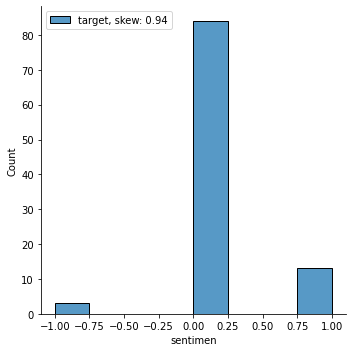

In [51]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer()

In [54]:
positive_low_reviews = df_new[(df_new["sentimen"] == 1)]
negative_low_reviews = df_new[(df_new["sentimen"] == -1)]
positive_high_reviews = df_new[(df_new["sentimen"] == 2)]
negative_high_reviews = df_new[(df_new["sentimen"] == -2)]

### cek emosi positive low

In [55]:
positive_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
2,RT @nadilawantari_: [NEWS] Hari ini Nadila Wan...,1,rt user news hari ini nadila wantari akan live...,"[rt, user, news, hari, ini, nadila, wantari, a...","[rt, user, news, hari, ini, nadila, wantari, a...",rt user news hari ini nadila wantari akan live...,rt user news hari nadila wantari live aplikasi...
10,RT @akusayangdk: Hai MY👋🏼\nSiapa nih yg cari a...,1,rt user hai my siapa nih yg cari aebong yuk bi...,"[rt, user, hai, my, siapa, nih, yg, cari, aebo...","[rt, user, hai, my, siapa, ini, yang, cari, ae...",rt user hai my siapa ini yang cari aebong ayo ...,rt user hai my siapa yang cari aebong ayo cek ...
37,Kejar Diskon Spesial | Tokopedia\n⏰22:00\n\n💵R...,1,kejar diskon spesial tokopedia time rp25 numbe...,"[kejar, diskon, spesial, tokopedia, time, rp25...","[kejar, diskon, spesial, tokopedia, time, rp25...",kejar diskon spesial tokopedia time rp25 numbe...,kejar diskon spesial tokopedia time rp25 numbe...
43,Kejar Diskon Spesial | Tokopedia\n⏰22:00\n\n💵R...,1,kejar diskon spesial tokopedia time rp20 numbe...,"[kejar, diskon, spesial, tokopedia, time, rp20...","[kejar, diskon, spesial, tokopedia, time, rp20...",kejar diskon spesial tokopedia time rp20 numbe...,kejar diskon spesial tokopedia time rp20 numbe...
48,RT @m_promosindo2: Nama Meja Bank BRI stainles...,1,rt user nama meja bank bri stainless berholder...,"[rt, user, nama, meja, bank, bri, stainless, b...","[rt, user, nama, meja, bank, bri, stainless, b...",rt user nama meja bank bri stainless berholder...,rt user nama meja bank bri stainless berholder...


In [56]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [57]:
Positive_1_tf_idf.shape

(13, 282)

In [58]:
!pip3 install wordcloud

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [60]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('number', 7.663527763378787)
('user', 7.663527763378787)
('rt', 7.558167247720961)
('rt user', 7.558167247720961)
('iya', 7.306852819440055)
('ready', 7.306852819440055)
('cek', 7.1527021396127966)
('aebong', 6.970380582818842)
('aebong ayo', 6.970380582818842)
('ayo', 6.970380582818842)
('ayo cek', 6.970380582818842)
('buru', 6.970380582818842)
('buru habis', 6.970380582818842)
('cari', 6.970380582818842)
('cari aebong', 6.970380582818842)
('cek sini', 6.970380582818842)
('cos9', 6.970380582818842)
('habis', 6.970380582818842)
('habis number', 6.970380582818842)
('hai', 6.970380582818842)
('hai my', 6.970380582818842)
('iya buru', 6.970380582818842)
('my', 6.970380582818842)
('my siapa', 6.970380582818842)
('number cos9', 6.970380582818842)
('official', 6.970380582818842)
('official iya', 6.970380582818842)
('ready official', 6.970380582818842)
('siapa', 6.970380582818842)
('siapa yang', 6.970380582818842)
('sini', 6.970380582818842)
('sini stok', 6.970380582818842)
('stok', 6.970380

C:\Users\ACER SWIFT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

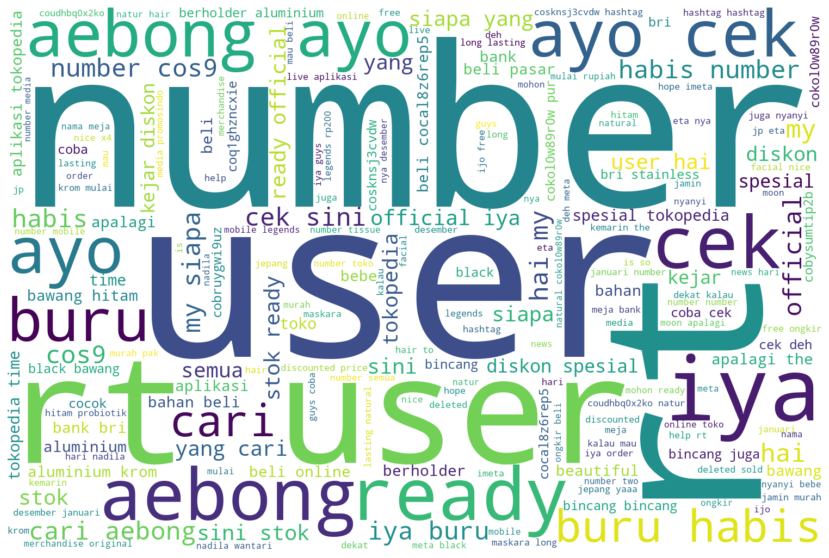

In [62]:
PlotWordCloud(d)

### cek emosi positive high

In [63]:
positive_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


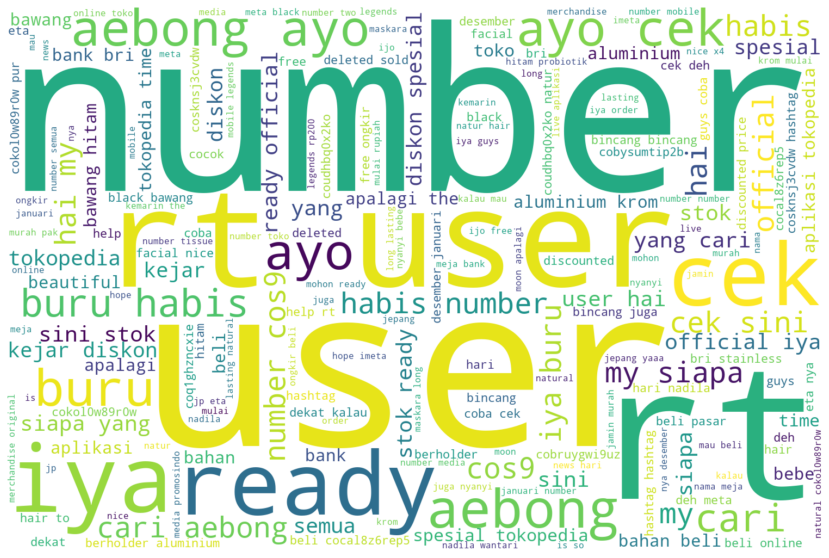

In [64]:
PlotWordCloud(d)

### cek emosi negative low

In [65]:
negative_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
15,@__enaktau ini tapi expired maret 2023 (duh ma...,-1,user ini tapi expired maret number duh mahal s...,"[user, ini, tapi, expired, maret, number, duh,...","[user, ini, tapi, expired, maret, number, aduh...",user ini tapi expired maret number aduh mahal ...,user tapi expired maret number aduh mahal seka...
22,"Pengen tau deh,kalau versi bunda ngebersihin k...",-1,pengen tau deh kalau versi bunda ngebersihin k...,"[pengen, tau, deh, kalau, versi, bunda, ngeber...","[ingin, tau, deh, kalau, versi, bunda, ngebers...",ingin tau deh kalau versi bunda ngebersihin ka...,tau deh kalau versi bunda ngebersihin kamar de...
76,WTS\nEksklusif Photobook BTS X TOKOPEDIA\n\nLI...,-1,wts eksklusif photobook bts tokopedia limited ...,"[wts, eksklusif, photobook, bts, tokopedia, li...","[wts, eksklusif, photobook, bts, tokopedia, li...",wts eksklusif photobook bts tokopedia limited ...,wts eksklusif photobook bts tokopedia limited ...


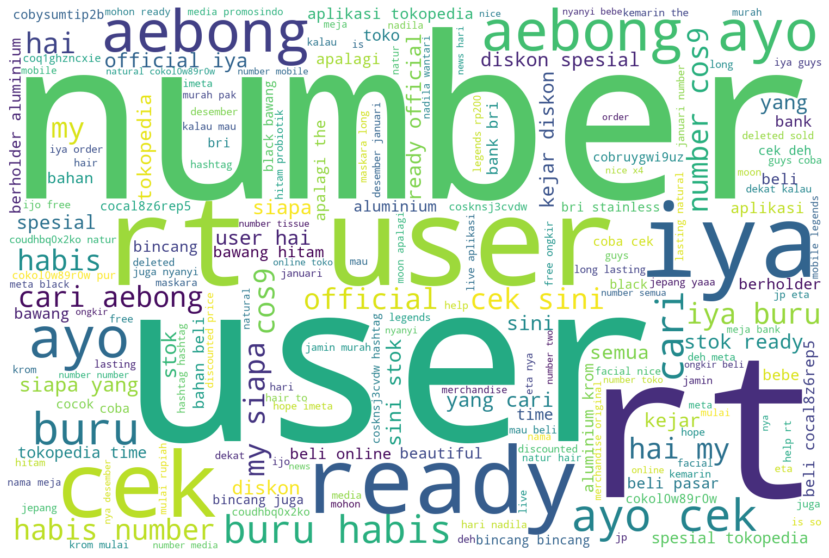

In [66]:
PlotWordCloud(d)

### cek emosi negative high

In [67]:
negative_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


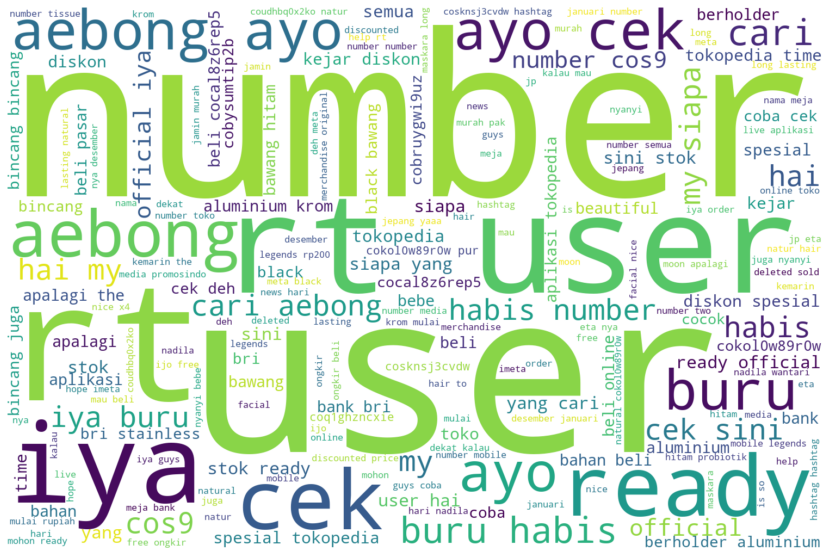

In [68]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [69]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [70]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [71]:
Data_TFIDF.shape

(100, 1643)

## Training dan Testing dibagi menjadi 70 - 30

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [73]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [74]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [76]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [77]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [78]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [79]:
## Berapa nilai Accuracy Training set dan Test Set
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)


Accuracy Training set:  1.0
Accuracy Test set:  0.7666666666666667


In [80]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)


Recall Training set:  1.0
Recall Test set:  0.7666666666666667


In [81]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.7055555555555556


C:\Users\ACER SWIFT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


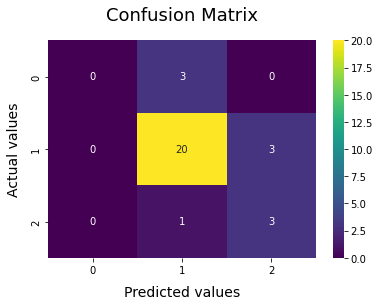

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [83]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [84]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.766667


In [85]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [86]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.766667,0.766667,0.705556


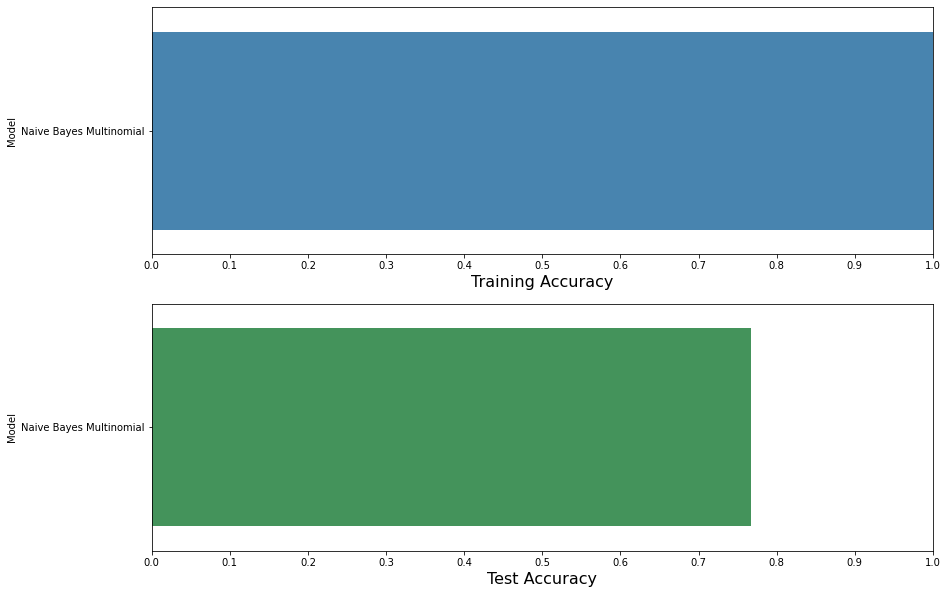

In [87]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan
Dari hasil pengujian setelah melakukan proses stemming dan stopwords dapat dilihat bahwa nilai training dan testing memiliki nilai akurasi yang tinggi dimana untuk training memiliki nilai akurasi sebanyak 1.0 sedangkan testing memiliki nilai akurasi 0.76